Introduction
--------------

* Aliasing
* Decimation
* Interpolation 

The following plot shows that two different signal frequencies (i.e.,
$f=0$, $f=f_s$) can generate the *exact* same samples.

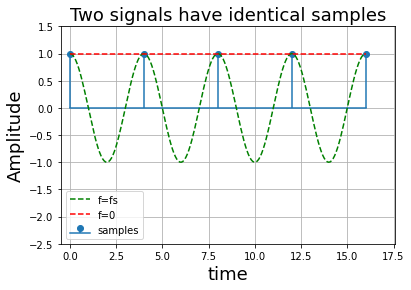

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(5)
fs = 0.25
t = np.linspace(0,n.max()/fs,200)

fig,ax = plt.subplots()

ax.stem(n/fs, np.cos(2*np.pi*n), basefmt='', label='samples')
ax.plot(t, np.cos(2*np.pi*fs*t),'--g', label='f=fs')
ax.plot(t, t*0+1, 'r--', label='f=0')
ax.set_ylim(top=1.5, bottom=-2.5)
ax.set_xlim(left=-.5, right=t.max()*1.1)
ax.grid()
ax.set_xlabel('time', fontsize=18)
ax.set_ylabel('Amplitude', fontsize=18)
ax.set_title('Two signals have identical samples', fontsize=18)
ax.legend(loc=0)

This is the *aliasing* problem and it is a fact of  sampling. In fact, its implications are even more problematic.

In [2]:
from __future__ import  division
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec

def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k = np.arange(Nfft)
    if N is None: 
        N = Nfft
    n = arange(N)
    U = matrix(exp(1j* 2*pi/Nfft *k*n[:,None])) # use numpy broadcasting to create matrix
    return U/sqrt(Nfft)

def facet_filled(x,alpha=0.5,color='b'):
    'construct 3D facet from adjacent points filled to zero'
    a, b = x
    a0 = a*np.array([1,1,0])
    b0 = b*np.array([1,1,0])
    ve = np.vstack([a,a0,b0,b])      # create closed polygon facet
    poly = Poly3DCollection([ve]) # create facet
    poly.set_alpha(alpha)
    poly.set_color(color)
    return poly

def drawDFTView(X,ax=None,fig=None):
    'above code as a function. Draws 3D diagram given DFT matrix'
    a = 2*np.pi/len(X)*np.arange(len(X))
    d = np.vstack([np.cos(a), np.sin(a), np.array(abs(X)).flatten()]).T
    if ax is None and fig is None:
        fig = plt.figure()
        fig.set_size_inches(6,6)
        
    if ax is None: # add ax to existing figure
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        
    ax.axis([-1,1,-1,1])
    ax.set_zlim([0,d[:,2].max()])
    ax.set_aspect('auto')
    ax.view_init(azim=-30)
    a=FancyArrow(0,0,1,0,width=0.02, length_includes_head=True)
    ax.add_patch(a)
    b=FancyArrow(0,0,0,1,width=0.02, length_includes_head=True)
    ax.add_patch(b)
    art3d.patch_2d_to_3d(a)
    art3d.patch_2d_to_3d(b)
    ax.axis('off')

    sl=[slice(i,i+2) for i in range(d.shape[0]-2)] # collect neighboring points
    for s in sl:
      poly=facet_filled(d[s,:])
      ax.add_collection3d(poly)
     
    # edge polygons    
    ax.add_collection3d(facet_filled(d[[-1,0],:]))
    ax.add_collection3d(facet_filled(d[[-2,-1],:]))

In [3]:
from scipy.signal import chirp

f0 = 0 # start frequency
t1 = 2 # end-time
f1 = 10 # frequency at end-time
fs = 40 # sample rate

t = np.arange(0,t1,1/fs)
x = chirp(t,f0,t1,f1)

#drawDFTView(fft.fft(x,512),ax=None,fig=None)


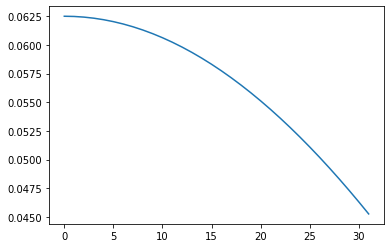

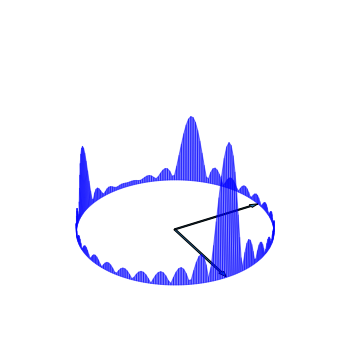

In [4]:
def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= np.arange(Nfft)
    if N is None: 
        N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None])) # use numpy broadcasting to create matrix
    return U/np.sqrt(Nfft)

U = dftmatrix(128*2,32)
plt.plot(U[:,1].real)

drawDFTView(U.H*(U[:,0]+U[:,100]).real)

$$ \Omega_k = \frac{2\pi}{N} k $$

and for sampled frequency,

$$ f_k = \frac{f_s}{N} k $$


$$ \delta f = f_s/N$$

$$ \Omega_{k+N} = \Omega_k$$

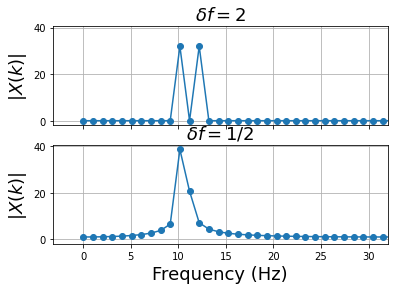

In [5]:
Nf = 64
fs = 64 # delta_f = 1 Hz
f = 10
t = np.arange(0,1,1/fs)
deltaf = 1/2.

fig, ax = plt.subplots(2,1,sharex=True,sharey=True)

x = np.cos(2*np.pi*f*t) + np.cos(2*np.pi*(f+2)*t)
X = np.fft.fft(x, Nf)
ax[0].plot(np.linspace(0, fs, len(X)), abs(X),'-o')
ax[0].set_title(r'$\delta f = 2$',fontsize=18)
ax[0].set_ylabel(r'$|X(k)|$', fontsize=18)
ax[0].grid()

x = np.cos(2*np.pi*f*t) + np.cos(2*np.pi*(f+deltaf)*t)
X = np.fft.fft(x, Nf)
ax[1].plot(np.linspace(0, fs, len(X)), abs(X), '-o')
ax[1].set_title(r'$\delta f = 1/2$', fontsize=18)
ax[1].set_ylabel(r'$|X(k)|$', fontsize=18)
ax[1].set_xlabel('Frequency (Hz)', fontsize=18)
ax[1].set_xlim(xmax = fs/2)
ax[1].grid()

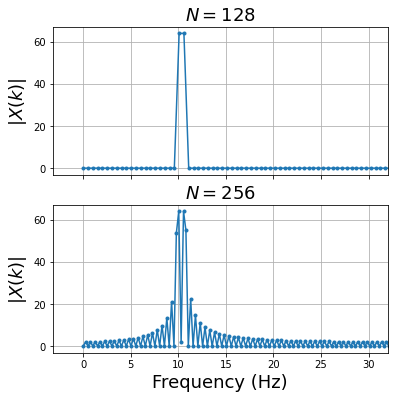

In [10]:
Nf = 64*2
fig,ax = plt.subplots(2, 1, sharex=True, sharey=True)
fig.set_size_inches((6, 6))

X = np.fft.fft(x, Nf)
ax[0].plot(np.linspace(0, fs, len(X)), abs(X), '-o', ms=3.)
ax[0].set_title(r'$N=%d$'%Nf, fontsize=18)
ax[0].set_ylabel(r'$|X(k)|$', fontsize=18)
ax[0].grid()


Nf = 64*4
X = np.fft.fft(x, Nf)
ax[1].plot(np.linspace(0, fs, len(X)), abs(X), '-o', ms=3.)
ax[1].set_title(r'$N=%d$'%Nf, fontsize=18)
ax[1].set_ylabel(r'$|X(k)|$', fontsize=18)
ax[1].set_xlabel('Frequency (Hz)', fontsize=18)
ax[1].set_xlim(xmax = fs/2)
ax[1].grid()

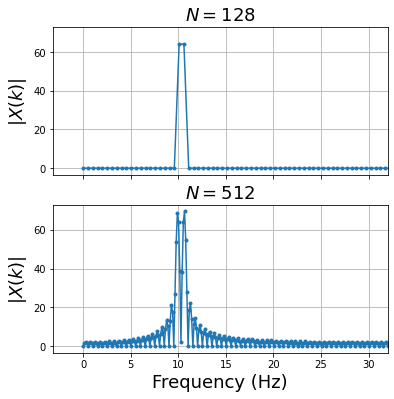

In [11]:
t = np.arange(0,2,1/fs)
x = np.cos(2*np.pi*f*t) + np.cos(2*np.pi*(f+deltaf)*t)

Nf = 64*2
fig,ax = plt.subplots(2, 1, sharex=True, sharey=True)
fig.set_size_inches((6, 6))

X = np.fft.fft(x,Nf)
ax[0].plot(np.linspace(0, fs, len(X)), abs(X), '-o', ms=3.)
ax[0].set_title(r'$N=%d$'%Nf, fontsize=18)
ax[0].set_ylabel(r'$|X(k)|$', fontsize=18)
ax[0].grid()

Nf = 64*8
X = np.fft.fft(x, Nf)
ax[1].plot(np.linspace(0, fs, len(X)), abs(X), '-o', ms=3.)
ax[1].set_title(r'$N=%d$'%Nf, fontsize=18)
ax[1].set_ylabel(r'$|X(k)|$', fontsize=18)
ax[1].set_xlabel('Frequency (Hz)', fontsize=18)
ax[1].set_xlim(xmax = fs/2)
ax[1].grid()

In [12]:
#t = arange(0,10,1/fs).reshape(10,-1)
#x=cos(2*pi*f*t) + cos(2*pi*(f+deltaf)*t)

$$ \frac{\sin \left( N_s  \frac{2\pi}{N} k\right)}{\sin \left( \frac{2\pi}{N} k \right)}$$

## Summary

In this section, we considered the Discrete Fourier Transform (DFT) using a matrix/vector approach. We used this approach to  develop an intuitive visual vocabulary for the DFT with respect to high/low frequency  and real-valued signals. We recognized that zero-padding an input signal is the same as analyzing more discrete frequencies in the transform domain.

As usual, the corresponding IPython notebook for this post  is available for download [here](https://github.com/unpingco/Python-for-Signal-Processing/blob/master/Fourier_Transform.ipynb). 

Comments and corrections welcome!

References
---------------

* Oppenheim, A. V., and A. S. Willsky. "Signals and Systems." Prentice-Hall, (1997).